In [1]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, Flatten, Dense, MaxPooling2D, Reshape, Conv2D, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [2]:
#Importing MNIST DataSet
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
#Normalizing the Train and Test Data
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [4]:
#Designing the CNN Model
model = Sequential([
    Input(shape=(28, 28)),
    Reshape((28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [5]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape (Reshape)                    │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 423,338 (1.61 MB)

 Trainable params: 423,338 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

None


In [6]:
#Reshaping Test Data
X_test = X_test.reshape(-1, 28, 28, 1)

In [7]:
history = model.fit(X_train, Y_train, epochs=10, batch_size=120, validation_data=(X_test, Y_test))

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.7797 - loss: 0.7023 - val_accuracy: 0.9719 - val_loss: 0.0886
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 38ms/step - accuracy: 0.9588 - loss: 0.1351 - val_accuracy: 0.9834 - val_loss: 0.0508
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 39ms/step - accuracy: 0.9711 - loss: 0.0928 - val_accuracy: 0.9870 - val_loss: 0.0407
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9783 - loss: 0.0708 - val_accuracy: 0.9873 - val_loss: 0.0360
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9793 - loss: 0.0641 - val_accuracy: 0.9889 - val_loss: 0.0330
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - accuracy: 0.9808 - loss: 0.0605 - val_accuracy: 0.9897 - val_loss: 0.0309
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.9833 - loss: 0.0544 - val_accuracy: 0.9904 - val_loss: 0.0274
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9842 - loss: 0.0503 - 

In [8]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print(f"Test_accuracy: {test_acc}")
print(f"Test_loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9900 - loss: 0.0317
Test_accuracy: 0.9912999868392944
Test_loss: 0.026936080306768417


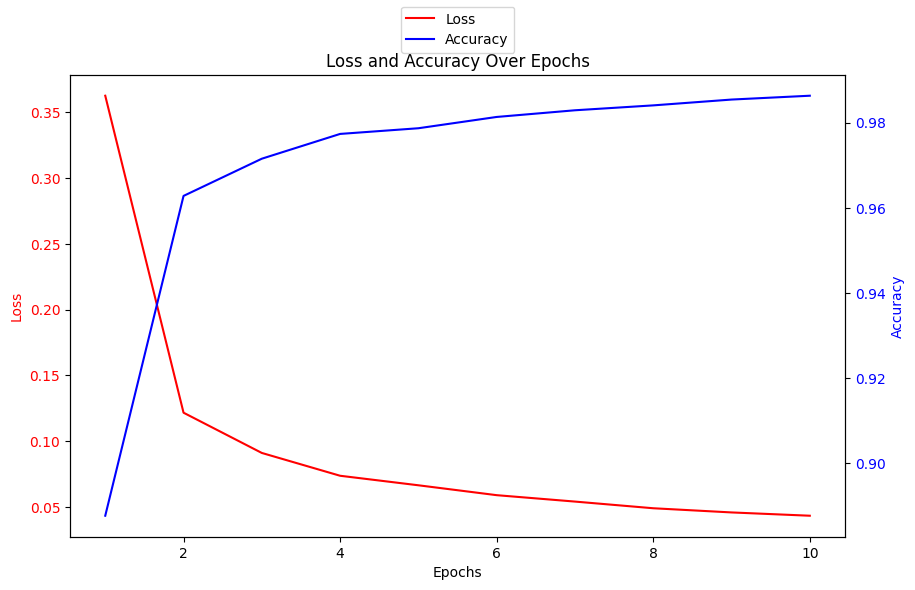

In [9]:
loss = history.history['loss']
accuracy = history.history['accuracy']
epochs = range(1, len(loss) + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(epochs, loss, 'r-', label='Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(epochs, accuracy, 'b-', label='Accuracy')
ax2.set_ylabel('Accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.legend(loc="upper center")
plt.title('Loss and Accuracy Over Epochs')
plt.show()

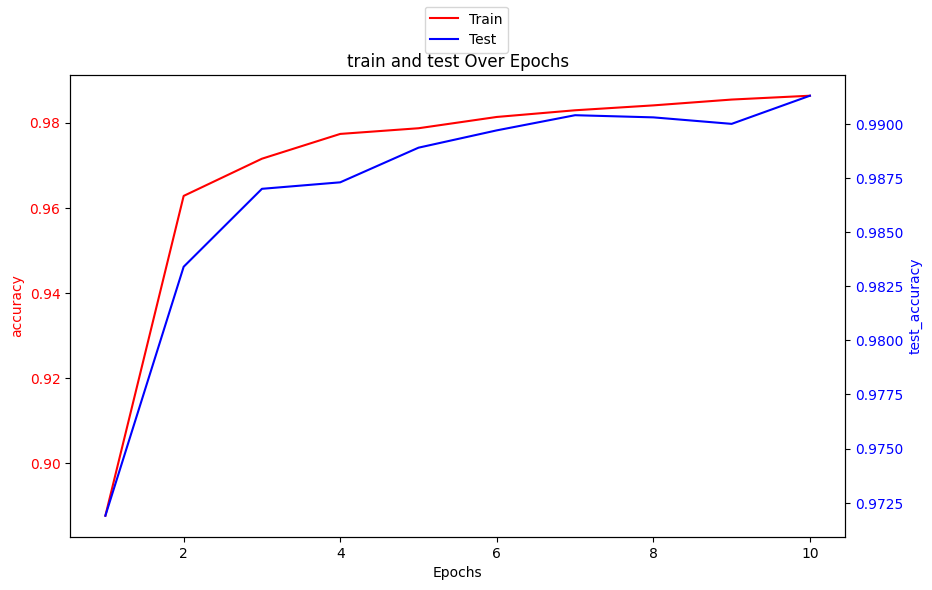

In [10]:
accuracy = history.history['accuracy']
test_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(epochs, accuracy, 'r-', label='Train')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('accuracy', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(epochs, test_accuracy, 'b-', label='Test')
ax2.set_ylabel('test_accuracy', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

fig.legend(loc="upper center")
plt.title('train and test Over Epochs')
plt.show()

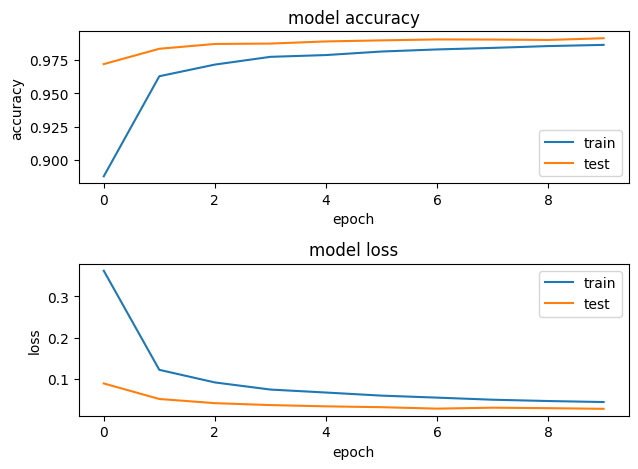

In [11]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [12]:
model.save('model.keras')